# ARIMA 
### Autoregressive integrated Moving Average
#### ARIMA models explain a time series on it's own past values, basically it's own lags and the lagged forecast errors.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [10]:
data=pd.read_csv('MaunaLoaDailyTemps.csv')
data.head()


,DATE,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
0,1/1/2014,33.0,46.0,40.0,657,1756
1,1/2/2014,35.0,50.0,43.0,657,1756
2,1/3/2014,36.0,45.0,41.0,657,1757
3,1/4/2014,32.0,41.0,37.0,658,1757
4,1/5/2014,24.0,38.0,31.0,658,1758


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DATE     1825 non-null   object 
 1   MinTemp  1821 non-null   float64
 2   MaxTemp  1821 non-null   float64
 3   AvgTemp  1821 non-null   float64
 4   Sunrise  1825 non-null   int64  
 5   Sunset   1825 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 85.7+ KB


In [12]:
data['DATE']=pd.to_datetime(data['DATE'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   DATE     1825 non-null   datetime64[ns]
 1   MinTemp  1821 non-null   float64       
 2   MaxTemp  1821 non-null   float64       
 3   AvgTemp  1821 non-null   float64       
 4   Sunrise  1825 non-null   int64         
 5   Sunset   1825 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 85.7 KB


In [13]:
data.isna().sum()

DATE       0
MinTemp    4
MaxTemp    4
AvgTemp    4
Sunrise    0
Sunset     0
dtype: int64

In [14]:
data=data.dropna()
data.isna().sum()

DATE       0
MinTemp    0
MaxTemp    0
AvgTemp    0
Sunrise    0
Sunset     0
dtype: int64

In [15]:
data.head()

,DATE,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
0,2014-01-01,33.0,46.0,40.0,657,1756
1,2014-01-02,35.0,50.0,43.0,657,1756
2,2014-01-03,36.0,45.0,41.0,657,1757
3,2014-01-04,32.0,41.0,37.0,658,1757
4,2014-01-05,24.0,38.0,31.0,658,1758


In [16]:
data['Year']=data['DATE'].dt.year
data['Month']=data['DATE'].dt.month

In [18]:
data.head()

,DATE,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset,Year,Month
0,2014-01-01,33.0,46.0,40.0,657,1756,2014,1
1,2014-01-02,35.0,50.0,43.0,657,1756,2014,1
2,2014-01-03,36.0,45.0,41.0,657,1757,2014,1
3,2014-01-04,32.0,41.0,37.0,658,1757,2014,1
4,2014-01-05,24.0,38.0,31.0,658,1758,2014,1


In [19]:
def plot_vars(data,x,y,year):
    fig,ax=plt.subplots(figsize=(20,10))
                        
    sns.lineplot(
        ax=ax,
        data=data,
        x=x,
        y=y,
        hue=year,
        palette='bright'
    )
                        
    plt.show()

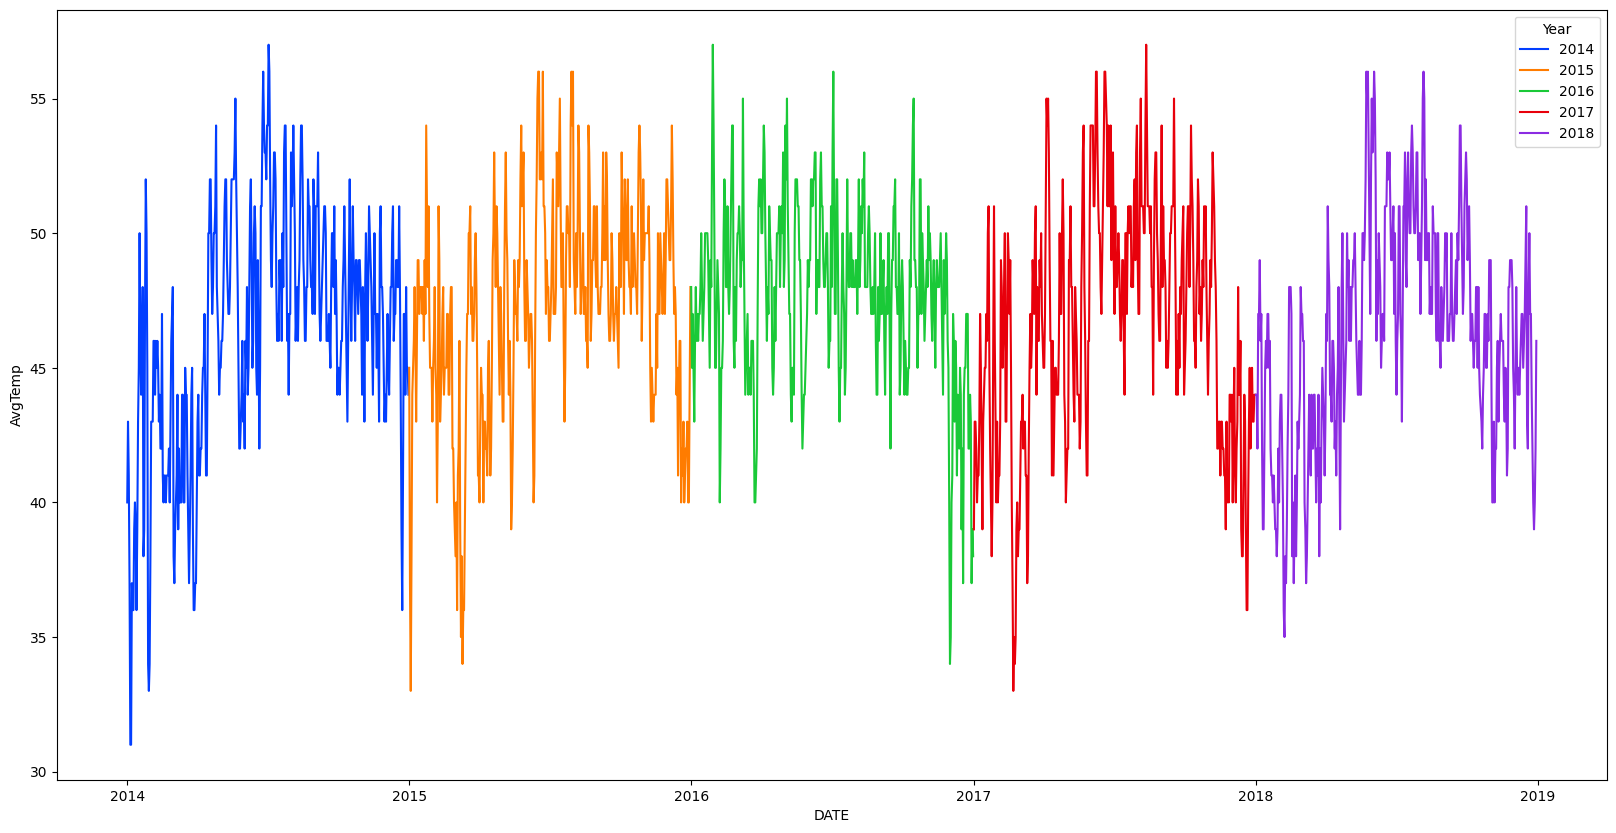

In [20]:
plot_vars(data,'DATE','AvgTemp','Year')

In [21]:
data.corr()

,DATE,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset,Year,Month
DATE,1.000000,0.053429,-0.000982,0.021973,-0.011647,-0.080985,0.979764,0.197419
MinTemp,0.053429,1.000000,0.756071,0.917456,-0.426821,0.300492,0.008075,0.227415
MaxTemp,-0.000982,0.756071,1.000000,0.951039,-0.374928,0.275876,-0.029029,0.137562
AvgTemp,0.021973,0.917456,0.951039,1.000000,-0.422829,0.304711,-0.015718,0.186884
Sunrise,-0.011647,-0.426821,-0.374928,-0.422829,1.000000,-0.739777,-0.002254,-0.049908
Sunset,-0.080985,0.300492,0.275876,0.304711,-0.739777,1.000000,0.002415,-0.415416
Year,0.979764,0.008075,-0.029029,-0.015718,-0.002254,0.002415,1.000000,-0.002077
Month,0.197419,0.227415,0.137562,0.186884,-0.049908,-0.415416,-0.002077,1.000000


In [22]:
ndata=data

In [23]:
ndata.head()

,DATE,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset,Year,Month
0,2014-01-01,33.0,46.0,40.0,657,1756,2014,1
1,2014-01-02,35.0,50.0,43.0,657,1756,2014,1
2,2014-01-03,36.0,45.0,41.0,657,1757,2014,1
3,2014-01-04,32.0,41.0,37.0,658,1757,2014,1
4,2014-01-05,24.0,38.0,31.0,658,1758,2014,1


# preprocessing for ARIMA Model

In [24]:
ndata=ndata.drop(columns=['MinTemp','MaxTemp','Sunrise','Sunset','Year','Month'])

In [25]:
ndata=ndata.set_index('DATE')

In [26]:
ndata.head()

,AvgTemp
DATE,
2014-01-01,40.0
2014-01-02,43.0
2014-01-03,41.0
2014-01-04,37.0
2014-01-05,31.0


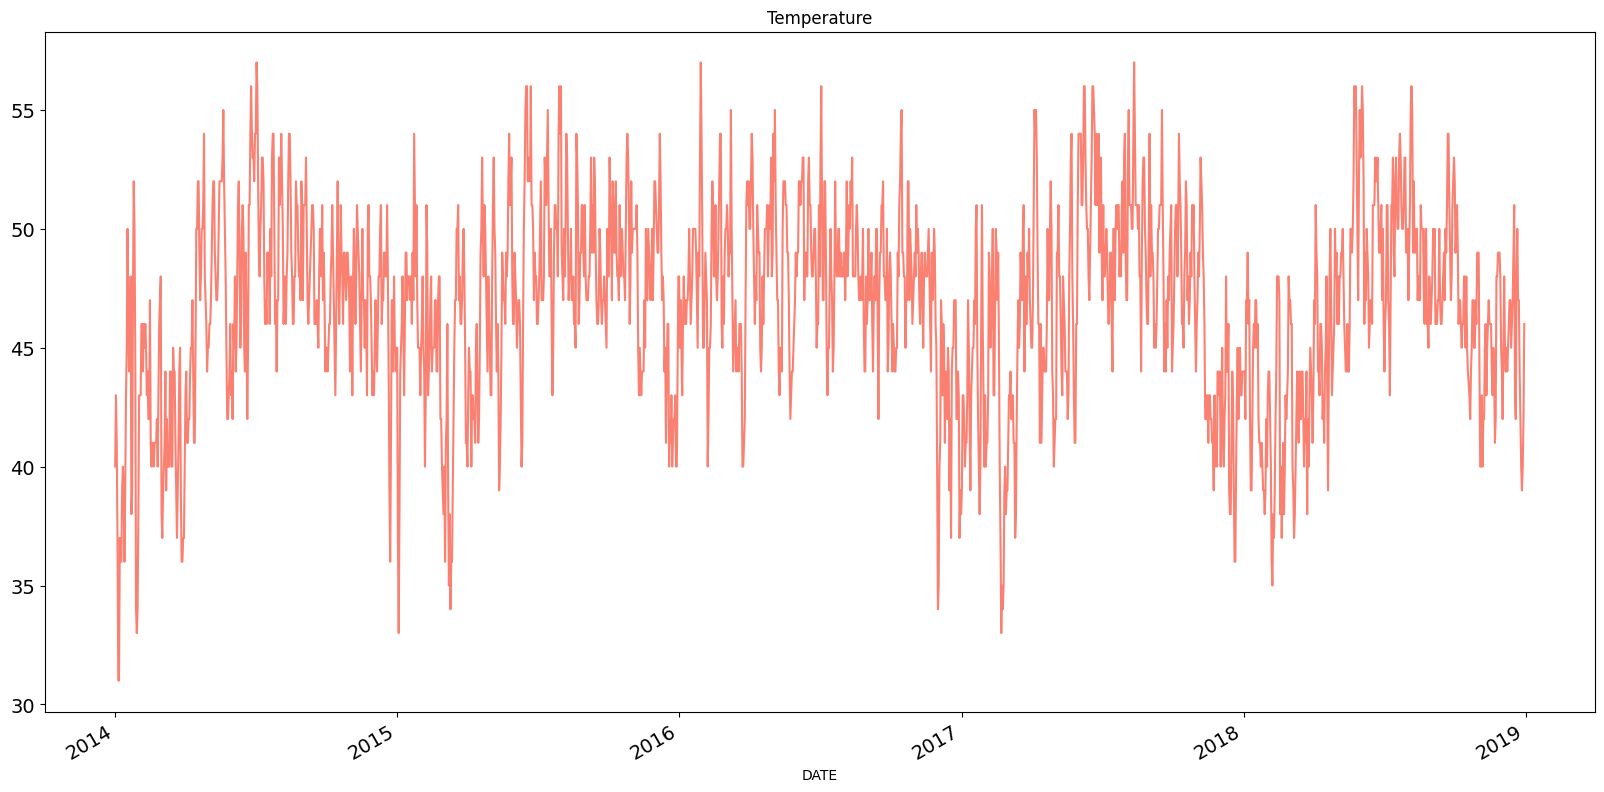

In [27]:
plt.figure(figsize=(20,10))
ndata.AvgTemp.plot(title='Temperature',fontsize=14,color='salmon')
plt.show()

## ADF test (Augmented Dickey Fuller Test) to check if the price sales is stationary

In [28]:
from statsmodels.tsa.stattools import adfuller
def adf_test(ndata):
     ndatatest = adfuller(ndata, autolag = 'AIC')
     print("1. ADF : ",ndatatest[0])
     print("2. P-Value : ", ndatatest[1])
     print("3. Num Of Lags : ", ndatatest[2])
     print("4. Num Of Observations Used For ADF Regression:",ndatatest[3])
     print("5. Critical Values :")
     for key, val in ndatatest[4].items():
         print("\t",key, ": ", val)
adf_test(ndata['AvgTemp'])

1. ADF :  -6.554680125068785
2. P-Value :  8.675937480199322e-09
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression: 1808
5. Critical Values :
	 1% :  -3.433972018026501
	 5% :  -2.8631399192826676
	 10% :  -2.5676217442756872


### we always consider the null hypothesis of the time series is non-stationary, so if p-value is less than significance level, we can reject null hypothesis

### auto_arima in the pmdarima library is a function that automatically selects the best ARIMA model for a given time series d

In [29]:
from pmdarima import auto_arima
arimadata=auto_arima(ndata['AvgTemp'],trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=8344.610, Time=1.42 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=10347.755, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=8365.701, Time=0.13 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=9136.225, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=19192.139, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=8355.947, Time=1.14 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=8356.308, Time=1.12 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=8347.221, Time=1.57 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=8317.212, Time=1.77 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=8330.189, Time=1.69 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=8310.657, Time=2.26 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=8332.297, Time=2.85 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=8317.638, Time=3.46 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=8305.878, Time=2.04 sec
 ARIMA(1,0,4)(0,0,0)[0] interce

In [30]:
import statsmodels.api as sm

In [31]:
train=ndata.iloc[:-30]
test=ndata.iloc[-30:]
print(train.shape,test.shape)
print(ndata.shape)

(1791, 1) (30, 1)
(1821, 1)


In [35]:
train.head()

,AvgTemp
DATE,
2014-01-01,40.0
2014-01-02,43.0
2014-01-03,41.0
2014-01-04,37.0
2014-01-05,31.0


In [36]:
test.head()

,AvgTemp
DATE,
2018-12-01,44.0
2018-12-02,42.0
2018-12-03,45.0
2018-12-04,48.0
2018-12-05,45.0


In [32]:
model=sm.tsa.arima.ARIMA(train['AvgTemp'],order=(1,0,5))
model=model.fit()
model.summary()

C:\Users\shubh\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\shubh\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\shubh\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                AvgTemp   No. Observations:                 1791
Model:                 ARIMA(1, 0, 5)   Log Likelihood               -4070.198
Date:                Fri, 25 Oct 2024   AIC                           8156.395
Time:                        19:48:27   BIC                           8200.320
Sample:                             0   HQIC                          8172.614
                               - 1791                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.5856      0.758     61.454      0.000      45.100      48.071
ar.L1          0.9856      0.005    188.230      0.000       0.975       0.996
ma.L1         -0.1412      0.023     -6.124      0.000      -0.186      -0.096
ma.L2         -0.2268      0.024     -9.635      0.000      -0.273      -0.181
ma.L3         -0.2168      0.023     -9.251      0.000      -0.263      -0.171
ma.L4         -0.1479      0.023     -6.491      0.000      -0.193      -0.103
ma.L5         -0.0595      0.024     -2.438      0.015      -0.107      -0.012
sigma2         5.5093      0.174     31.624      0.000       5.168       5.851
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                14.88
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                            -0.15
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [41]:
start=len(train)
end=len(train)+len(test)-1
print(f'start argument of predict function is {start}')
print(f'end argument of predict function is {len(train)+len(test)-1}')
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.index=ndata.index[start:end+1]
print(pred)
pred.dtypes

start argument of predict function is 1791
end argument of predict function is 1820
DATE
2018-12-01    44.754109
2018-12-02    44.987795
2018-12-03    45.388741
2018-12-04    45.721545
2018-12-05    45.863733
2018-12-06    45.874126
2018-12-07    45.884370
2018-12-08    45.894466
2018-12-09    45.904417
2018-12-10    45.914225
2018-12-11    45.923891
2018-12-12    45.933419
2018-12-13    45.942809
2018-12-14    45.952063
2018-12-15    45.961185
2018-12-16    45.970175
2018-12-17    45.979036
2018-12-18    45.987770
2018-12-19    45.996377
2018-12-20    46.004861
2018-12-21    46.013222
2018-12-22    46.021463
2018-12-23    46.029586
2018-12-24    46.037591
2018-12-25    46.045481
2018-12-26    46.053258
2018-12-27    46.060923
2018-12-28    46.068477
2018-12-29    46.075923
2018-12-30    46.083261
Name: ARIMA Predictions, dtype: float64


C:\Users\shubh\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


dtype('float64')

In [43]:
forecast=model.forecast(steps=5).rename('ARIMA Predictions')

print(forecast)
forecast.dtypes

1791    44.754109
1792    44.987795
1793    45.388741
1794    45.721545
1795    45.863733
Name: ARIMA Predictions, dtype: float64


C:\Users\shubh\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


dtype('float64')

<Axes: xlabel='DATE'>

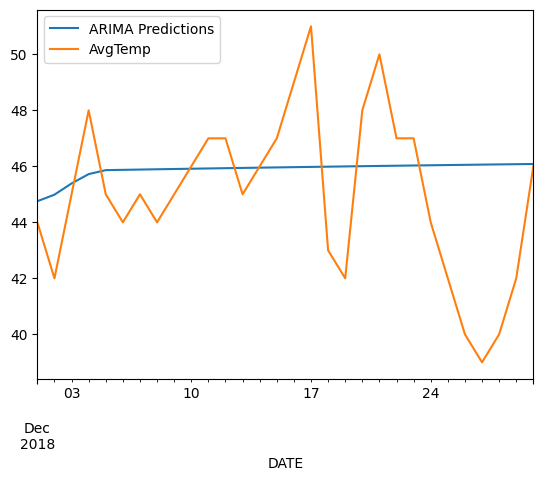

In [34]:
pred.plot(legend=True)
test['AvgTemp'].plot(legend=True)

In [38]:
# Load the model from the file
# Save the trained model to a file
joblib.dump(model, "arima_model.pkl")


['arima_model.pkl']

In [3]:
model = joblib.load('arima_model.pkl')

In [5]:
model.forecast(steps=25)

C:\Users\shubh\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


1791    44.754109
1792    44.987795
1793    45.388741
1794    45.721545
1795    45.863733
1796    45.874126
1797    45.884370
1798    45.894466
1799    45.904417
1800    45.914225
1801    45.923891
1802    45.933419
1803    45.942809
1804    45.952063
1805    45.961185
1806    45.970175
1807    45.979036
1808    45.987770
1809    45.996377
1810    46.004861
1811    46.013222
1812    46.021463
1813    46.029586
1814    46.037591
1815    46.045481
Name: predicted_mean, dtype: float64